In [6]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("PNQ_AQI.csv")
df

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
0,2009-01-01 00:00:00,15,53,179.0,NaN,NaN,153.0,MPCB-KR
1,2009-02-01 00:00:00,15,48,156.0,NaN,NaN,137.0,MPCB-KR
2,2009-03-01 00:00:00,13,51,164.0,NaN,NaN,143.0,MPCB-KR
3,2009-04-01 00:00:00,8,37,135.0,NaN,NaN,123.0,MPCB-KR
4,2009-07-01 00:00:00,13,36,140.0,NaN,NaN,127.0,MPCB-KR
...,...,...,...,...,...,...,...,...
7839,18-01-2019,41,100,134.0,300.0,NaN,123.0,MPCB-SWGT
7840,19-01-2019,50,132,172.0,446.0,NaN,152.0,MPCB-SWGT
7841,23-01-2019,47,138,210.0,558.0,NaN,173.0,MPCB-SWGT
7842,2019-02-02 00:00:00,29,88,82.0,259.0,NaN,108.0,MPCB-SWGT


In [7]:
df.head()

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
0,2009-01-01 00:00:00,15,53,179.0,NaN,NaN,153.0,MPCB-KR
1,2009-02-01 00:00:00,15,48,156.0,NaN,NaN,137.0,MPCB-KR
2,2009-03-01 00:00:00,13,51,164.0,NaN,NaN,143.0,MPCB-KR
3,2009-04-01 00:00:00,8,37,135.0,NaN,NaN,123.0,MPCB-KR
4,2009-07-01 00:00:00,13,36,140.0,NaN,NaN,127.0,MPCB-KR


In [8]:
df.tail()

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
7839,18-01-2019,41,100,134.0,300.0,NaN,123.0,MPCB-SWGT
7840,19-01-2019,50,132,172.0,446.0,NaN,152.0,MPCB-SWGT
7841,23-01-2019,47,138,210.0,558.0,NaN,173.0,MPCB-SWGT
7842,2019-02-02 00:00:00,29,88,82.0,259.0,NaN,108.0,MPCB-SWGT
7843,2019-09-02 00:00:00,39,96,171.0,422.0,NaN,147.0,MPCB-SWGT


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7844 entries, 0 to 7843
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        7844 non-null   object 
 1   SO2 µg/m3   7844 non-null   object 
 2   Nox µg/m3   7844 non-null   object 
 3   RSPM µg/m3  7843 non-null   float64
 4   SPM         2970 non-null   float64
 5   CO2 µg/m3   0 non-null      float64
 6   AQI         7787 non-null   float64
 7   Location    7844 non-null   object 
dtypes: float64(4), object(4)
memory usage: 490.4+ KB


In [10]:
df["Date"]=pd.to_datetime(df["Date"])

ValueError: time data "13-01-2009" doesn't match format "%Y-%m-%d %H:%M:%S", at position 9. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [11]:
#task 3
relevant=["Date","SO2","No2","RSPM","SPM","CO2","AQI"]
relevant

['Date', 'SO2', 'No2', 'RSPM', 'SPM', 'CO2', 'AQI']

) missing from current font.ng\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


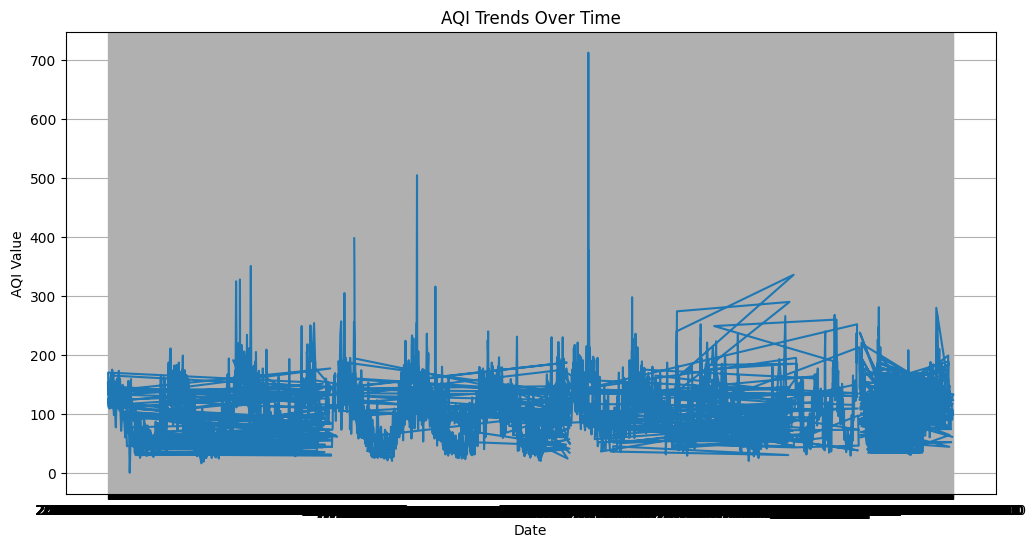

In [12]:


import matplotlib.pyplot as plt

# Assuming 'aqi_data' contains your relevant data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['AQI'])
plt.title('AQI Trends Over Time')
plt.xlabel('Date')
plt.ylabel('AQI Value')
plt.grid(True)
plt.show()


In [13]:
import matplotlib.pyplot as plt

# Define the pollutants you want to visualize
pollutants = ["No2","RSPM","SPM","CO2"]

# Create a line plot for each pollutant
for pollutant in pollutants:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[pollutant], marker='o', linestyle='-')
    plt.title(f'{pollutant} Trend Over Time')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} Level')
    plt.grid(True)
plt.show()


KeyError: 'No2'

<Figure size 1200x600 with 0 Axes>

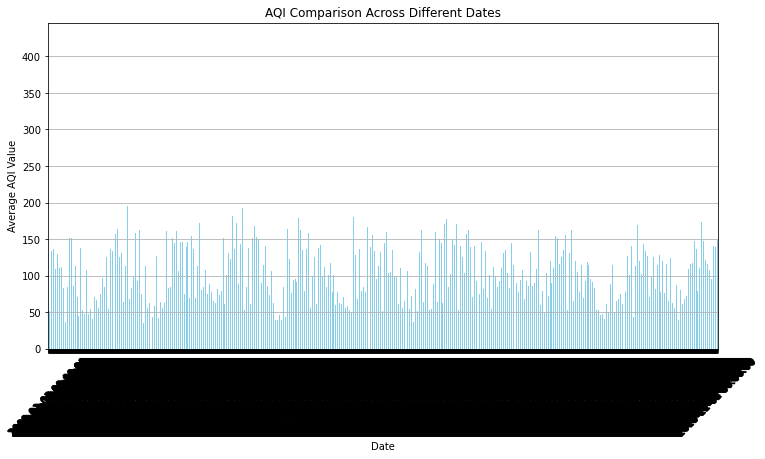

In [ ]:
import matplotlib.pyplot as plt

# Group data by Date and calculate the mean AQI for each date
daily_mean_aqi = df.groupby('Date')['AQI'].mean()

# Create a bar plot to compare AQI values across different dates
plt.figure(figsize=(12, 6))
daily_mean_aqi.plot(kind='bar', color='skyblue')
plt.title('AQI Comparison Across Different Dates')
plt.xlabel('Date')
plt.ylabel('Average AQI Value')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


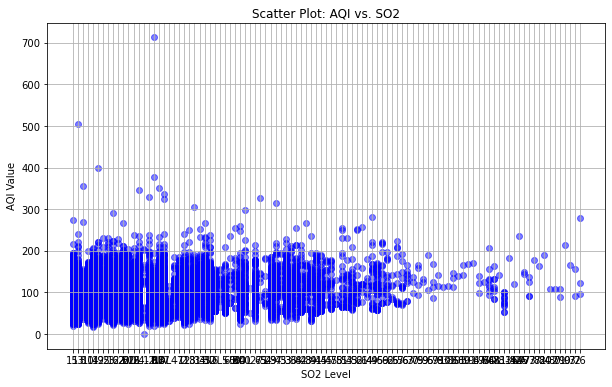

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot to explore the relationship between AQI and a single pollutant level (e.g., SO2)
plt.figure(figsize=(10, 6))
plt.scatter(df['SO2'], df['AQI'], alpha=0.5, color='b')
plt.title('Scatter Plot: AQI vs. SO2')
plt.xlabel('SO2 Level')
plt.ylabel('AQI Value')
plt.grid(True)
plt.show()
